In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv('D:/4th year/Machine Learning/Practice/Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7050, 16)

In [5]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

In [7]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [8]:
#Splitting
x = df.drop(['status_id','status_type','status_published'],axis=1) # x = df.drop('status_type',axis=1)
y = df['status_type']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) # X['status_type'] = le.fit_transform(X['status_type'])

In [10]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x) # transforming whole x attributes
x

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.00636943, 0.01960784,
        0.        ],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.        , 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
# Applying algorithm
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2,random_state=0)
km.fit(x)

KMeans(n_clusters=2, random_state=0)

In [12]:
#Performance metrics
print(km.cluster_centers_,'\n') # Cluster center refers to the centroid of a cluster, which is the mean position of all points in the cluster, representing a central location that minimizes the sum of squared distances within the cluster.
print('Insertia:',km.inertia_) # inertia measures the sum of squared distances between data points and their assigned cluster centroids, reflecting the compactness of clusters.

[[0.02483047 0.00932759 0.00889636 0.02254048 0.01423501 0.00215728
  0.00331136 0.00441161 0.00279261]
 [0.35566655 0.02806954 0.04734731 0.34084022 0.08499512 0.03631548
  0.01879727 0.00945925 0.01461694]] 

Insertia: 99.5008263837991


In [13]:
# check how many of the samples were correctly labeled for k = 2
labels = km.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}%'. format(correct_labels/float(y.size)*100))

Result: 275 out of 7050 samples were correctly labeled.
Accuracy score: 3.90%


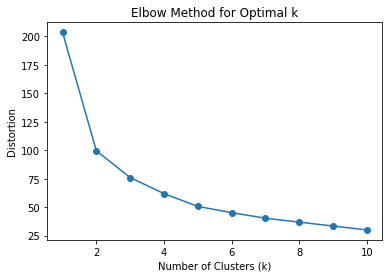

In [14]:
distortions = []    # pip install --upgrade sklearn

K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(K_range, distortions, marker='o')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()


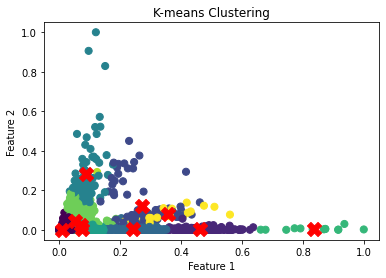

In [22]:
#Centroid Visualization
plt.scatter(x[:, 0], x[:, 1], c=km.labels_, cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=200 ,marker='X', c='red')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()